# Loan eligibility prediction:

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Reading data:

In [2]:
loan_dataframe=pd.read_csv("./Data/loan.csv")
loan_df= loan_dataframe.copy()
loan_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
444,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
296,Male,Yes,1,Graduate,No,6875,0.0,200.0,360.0,1.0,Semiurban,Y
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
378,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N
309,Male,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Data cleaning:

## Handling Missing Values

In [4]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df['Gender'] = loan_df['Gender'].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0])
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0]).astype('int')

**Handling Missing Values in loan_df**

In data preprocessing, handling missing values is crucial for building reliable machine learning models. In this section, we address the missing values in the loan_df DataFrame by filling them with appropriate statistics.

**Categorical Columns** 

For categorical columns, we fill missing values with the **mode** (the most frequent value). This approach is suitable as it retains the most common category in the dataset.

- **Gender**: Filled missing values with the mode of the Gender column.
- **Married**: Filled missing values with the mode of the Married column.
- **Dependents**: Filled missing values with the mode of the Dependents column.
- **Self_Employed**: Filled missing values with the mode of the Self_Employed column.

**Numerical Columns**

For numerical columns, we fill missing values with the **median**. The median is preferred over the mean in this case because it is less sensitive to outliers.

- **LoanAmount**: Filled missing values with the median of the LoanAmount column.
- **Loan_Amount_Term**: Filled missing values with the mode of the Loan_Amount_Term column.
- **Credit_History**: Filled missing values with the mode of the Credit_History column.


In [6]:
loan_df['Dependents'] = loan_df['Dependents'].replace({'3+': 3}) 
loan_df['Dependents'] = loan_df['Dependents'].astype(int)

In [7]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
loan_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
303,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1,Urban,Y
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0,Semiurban,Y
109,Male,Yes,3,Not Graduate,No,2071,754.0,94.0,480.0,1,Semiurban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0,Semiurban,N
390,Male,No,3,Graduate,No,9167,0.0,185.0,360.0,1,Rural,Y


# EDA:

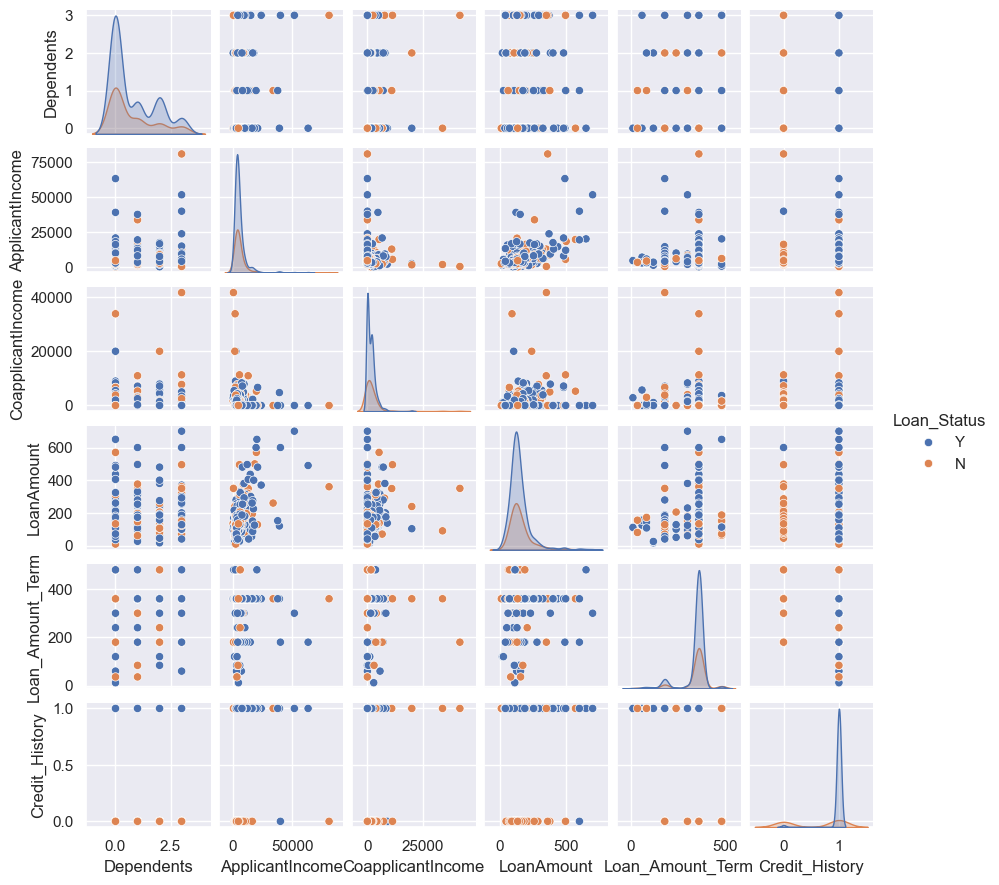

In [9]:
import seaborn as sns; sns.set()
sns.pairplot(loan_df, hue='Loan_Status', height=1.5);

# Feature Engineering :

### Encoding Categorical Variables in loan_df
Encoding categorical variables is a critical step in preparing our dataset for machine learning models. In this section, we will apply two common encoding techniques: Label Encoding and One-Hot Encoding.

## Label Encoding:
For ordinal categorical variables, we utilize Label Encoding to convert categories into unique integers. In our dataset, we treat the Dependents column as ordinal and apply Label Encoding:

In [10]:
label_encoder = LabelEncoder()
loan_df['Dependents'] = label_encoder.fit_transform(loan_df['Dependents'])
loan_df['Loan_Status'] = label_encoder.fit_transform(loan_df['Loan_Status'])

In [11]:
loan_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
49,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1,Semiurban,1
307,Female,No,0,Graduate,No,2400,1863.0,104.0,360.0,0,Urban,0
365,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1,Rural,0
211,Male,Yes,3,Graduate,No,3430,1250.0,128.0,360.0,0,Semiurban,0
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1,Rural,0


## One-Hot Encoding:
For nominal categorical variables, we employ One-Hot Encoding to create binary columns. This method is applied to the following columns:

- **Gender**
- **Married**
- **Self_Employed**
- **Property_Area**


We use pandas' get_dummies function for this purpose:

In [12]:
loan_df = pd.get_dummies(loan_df, columns=['Education', 'Gender', 'Married', 'Self_Employed', 'Property_Area'],
                           dtype="int")

In [13]:
loan_df.sample(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
147,1,1538,1425.0,30.0,360.0,1,1,1,0,0,1,0,1,1,0,0,0,1
184,0,3625,0.0,108.0,360.0,1,1,1,0,1,0,0,1,1,0,0,1,0
478,1,16667,2250.0,86.0,360.0,1,1,1,0,0,1,0,1,0,1,0,1,0
292,2,3153,1560.0,134.0,360.0,1,1,1,0,0,1,0,1,1,0,0,0,1
418,0,1025,2773.0,112.0,360.0,1,1,1,0,0,1,0,1,1,0,1,0,0


## Data Normalization:
To normalize the numerical data in your dataset, you can use techniques like Min-Max scaling or Standardization. 

In [14]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

scaler = MinMaxScaler()
loan_df[numerical_columns] = scaler.fit_transform(loan_df[numerical_columns])

### Min-Max Scaling

Min-Max scaling transforms the data into a range between 0 and 1. It can be done using the MinMaxScaler from scikit-learn.

## Splitting training and testing data:

In [15]:
X = loan_df.drop('Loan_Status',axis=1)
y = loan_df['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

#### Splitting the Dataset:
Splitting the dataset into training and testing sets is crucial for evaluating the performance of our machine learning model. The training set is used to train the model, while the testing set is used to assess how well the model generalizes to unseen data. 

In this example, we will allocate 25% of the data for testing and 75% for training. Additionally, we will use stratified sampling to ensure that the distribution of loan statuses is preserved in both sets.

# Models:

## Logistic regression:

In [16]:
c_valu = np.arange(0.01, 1, 0.01)
train_accuracy_logest = np.empty(len(c_valu))
test_accuracy_logest = np.empty(len(c_valu))

for i, k in enumerate(c_valu):    
    logest = LogisticRegression(solver='liblinear',C=k)
    
    logest.fit(X_train, y_train)
    
    
    train_accuracy_logest[i] = logest.score(X_train, y_train)
    test_accuracy_logest[i] = logest.score(X_test, y_test) 

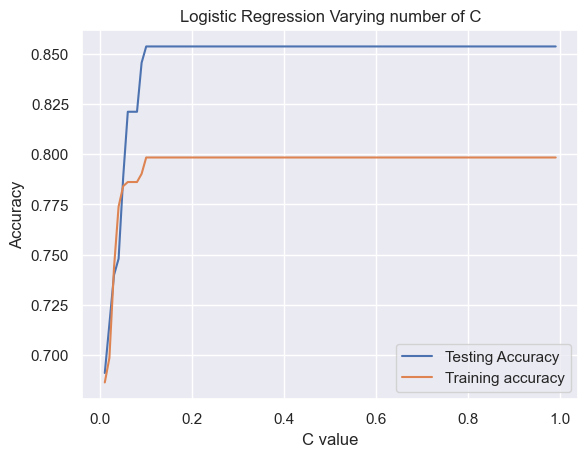

In [17]:
plt.title('Logistic Regression Varying number of C')
plt.plot(c_valu, test_accuracy_logest, label='Testing Accuracy')
plt.plot(c_valu, train_accuracy_logest, label='Training accuracy')
plt.legend()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid_01 = {'C': np.arange(0.01, 1, 0.01)}

grid_01 = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_01, cv=10)

grid_01.fit(X, y)

print(grid_01.best_params_)

{'C': 0.09999999999999999}


In [22]:
model_01 = LogisticRegression(solver='liblinear', C=0.09999999999999999)

model_01.fit(X_train, y_train)

y_predict_01 = model_01.predict(X_test)

accuracy_score(y_test, y_predict_01)

0.8536585365853658

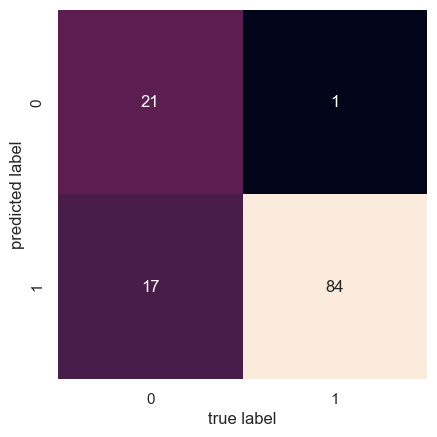

In [23]:
mat = confusion_matrix(y_test, y_predict_01)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');